### Study One Sample
- Select a small sample (3-5 points) of the dataset.
- Compare this sample to the dataset as a whole.
- Convert the samples into Z-scores.
- Prepare a heatmap and a barplot of your sample points and of the sample point z-scores.
- Prepare a speculation as to what each sample might represent.
- Discuss whether values across categories be easily compared.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from IPython.display import display
%matplotlib inline

In [2]:
housing_df = pd.read_csv('/home/jovyan/UCLA_CSX_450_2_2018_W/Project3_Housing/housing_data.csv',delim_whitespace=True, header=None)
housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df.drop(['MEDV'], axis=1, inplace=True)
housing_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [3]:
housing_df.shape

(506, 13)

In [4]:
stats = housing_df.describe().T
stats['skew'] = st.skew(housing_df)
stats['kurt'] = st.kurtosis(housing_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063,3.979949
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799,9.531453
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985


**Select a small sample (3-5 points) of the dataset.**

In [5]:
np.random.seed(223)
sample_1pct_1 = housing_df.sample(5)
sample_1pct_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398.0,15.2,382.84,4.56
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188.0,19.1,377.67,14.27
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,20.2,7.68,24.39


**Convert the samples into Z-scores.**

In [6]:
cols = list(sample_1pct_1.columns)
sample_1pct_1[cols]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398.0,15.2,382.84,4.56
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188.0,19.1,377.67,14.27
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,20.2,7.68,24.39


In [7]:
for col in cols:
    col_zscore = col + '_zscore'
    sample_1pct_1[col_zscore] = (sample_1pct_1[col] - sample_1pct_1[col].mean())/sample_1pct_1[col].std(ddof=0)
sample_1pct_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_zscore,NOX_zscore,RM_zscore,AGE_zscore,DIS_zscore,RAD_zscore,TAX_zscore,PTRATIO_zscore,B_zscore,LSTAT_zscore
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398.0,...,NaN,-1.733092,1.006612,-1.921322,1.836153,-0.588584,-0.203408,-1.911991,0.461765,-1.092116
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188.0,...,NaN,-0.075952,0.338121,0.244990,-0.231959,-0.873383,-1.265987,-0.019411,0.427874,-0.292022
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666.0,...,NaN,0.925236,-1.921669,0.871251,-1.157560,1.215141,1.152645,0.514393,0.553932,1.660834
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,...,NaN,-0.168016,0.369608,0.115011,0.036539,-0.968316,-0.835895,0.902615,0.553932,-0.818552
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,...,NaN,1.051823,0.207329,0.690069,-0.483173,1.215141,1.152645,0.514393,-1.997502,0.541856


In [23]:
sample_1pct_1_z = sample_1pct_1.iloc[:,-13:]
sample_1pct = sample_1pct_1.iloc[:,:13]

**Prepare a heatmap and a barplot of your sample points and of the sample point z-scores.**

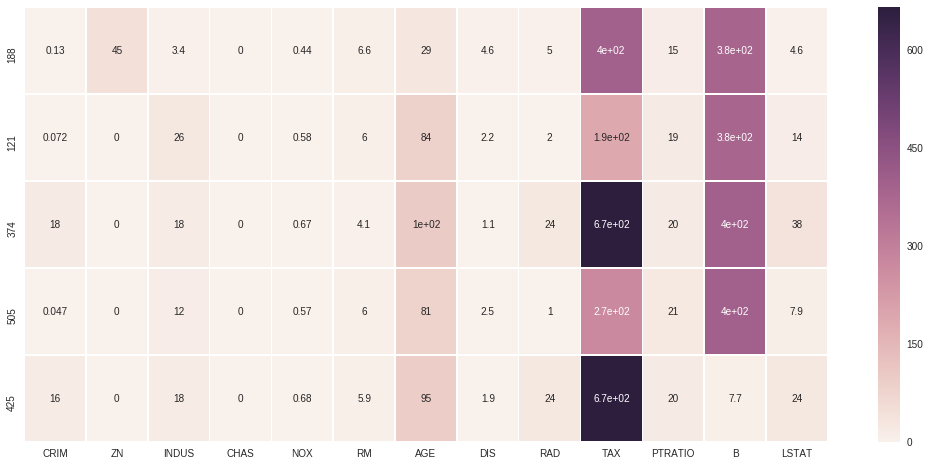

In [27]:
plt.figure(figsize = (18,8))
ax0 = sns.heatmap(sample_1pct,annot=True,linewidths=.5)

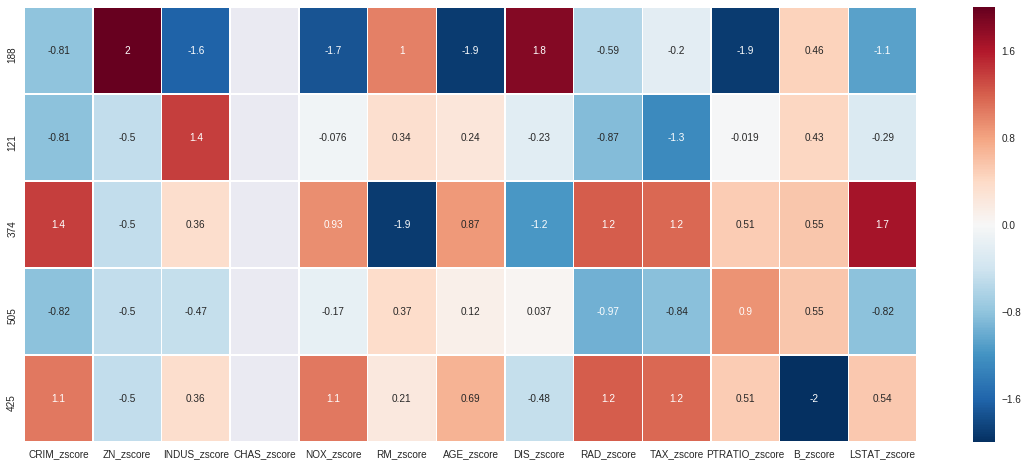

In [28]:
plt.figure(figsize = (20,8))
ax = sns.heatmap(sample_1pct_1_z,annot=True,linewidths=.5)

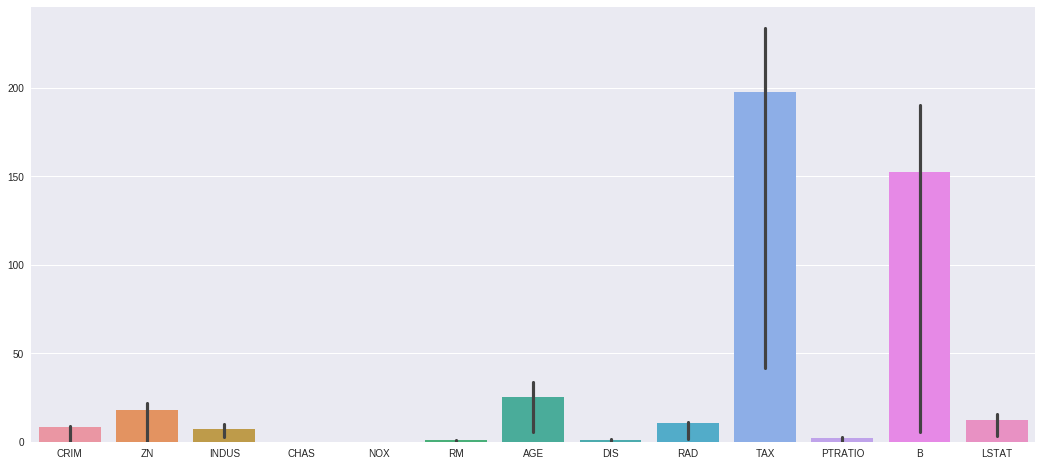

In [37]:
plt.figure(figsize = (18,8))
sns.barplot(data = sample_1pct,estimator=np.std)

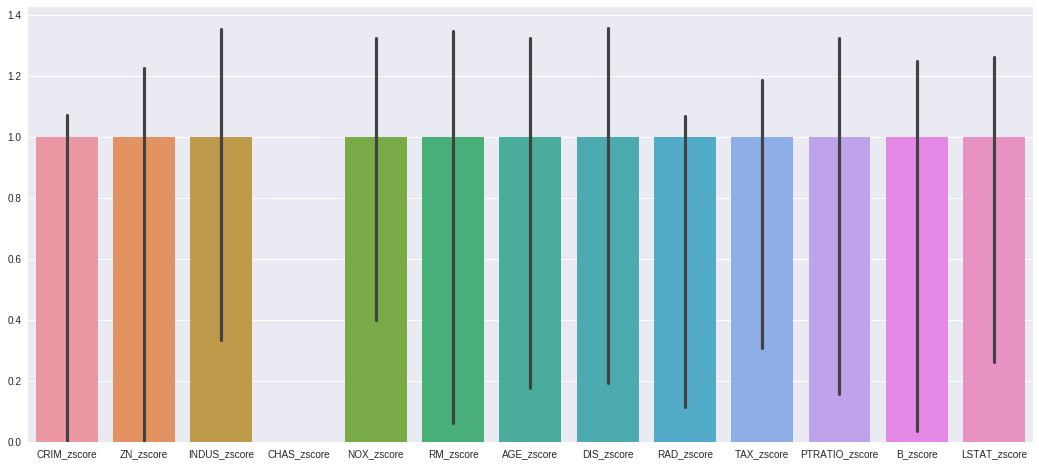

In [35]:
plt.figure(figsize = (18,8))
sns.barplot(data = sample_1pct_1_z,estimator=np.std)

**Prepare a speculation as to what each sample might represent.**

- Sample 188 has very less Crime with CRIM zscore at -0.81 may be due to this proportion of residential land zoned ZN value is high.
- Sample 374 represent an area with high crime rate & high LSAT ( % lower status of the population)